### Data analysis based on different experiment types for TTP

In [28]:
import os
import pandas as pd

In [58]:
df = pd.DataFrame()
df0 = pd.DataFrame()
folder_path = '../output_files/'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv') and filename.startswith('o'):
        # deal with results from previous code version
        file_path = os.path.join(folder_path, filename)
        data = pd.read_csv(file_path)
        # unique_exp_type = data['exp_type'].dropna().unique()
        # data['exp_type'] = data['exp_type'].fillna(unique_exp_type[0])
        df = pd.concat([df, data], ignore_index=True)
    elif filename.endswith('.csv') and filename.startswith('d'):
        # deal with results from the latest code
        file_path = os.path.join(folder_path, filename)
        data0 = pd.read_csv(file_path)
        df0 = pd.concat([df, data0], ignore_index=True)

In [30]:
# df.rename(columns={'exe_type': 'exp_type'}, inplace=True)

In [31]:
df.head()

,Time,Profit,Hypervolume,exp_type
0,1.165335e+07,461277.0,1.0,0.0
1,1.185127e+07,466526.0,1.0,0.0
2,1.200208e+07,468934.0,1.0,0.0
3,1.186140e+07,469082.0,1.0,0.0
4,1.196107e+07,469531.0,1.0,0.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         100 non-null    float64
 1   Profit       100 non-null    float64
 2   Hypervolume  500 non-null    float64
 3   exp_type     500 non-null    float64
dtypes: float64(4)
memory usage: 15.8 KB


In [33]:
df.isnull().sum()

Time           400
Profit         400
Hypervolume      0
exp_type         0
dtype: int64

In [34]:
df_tp = df.iloc[:, [0, 1, 3, 4]].copy()
df_tp

,Time,Profit,exp_type
0,1.165335e+07,461277.0,0.0
1,1.185127e+07,466526.0,0.0
2,1.200208e+07,468934.0,0.0
3,1.186140e+07,469082.0,0.0
4,1.196107e+07,469531.0,0.0
...,...,...,...
495,NaN,NaN,6.0
496,NaN,NaN,6.0
497,NaN,NaN,6.0
498,NaN,NaN,6.0


In [35]:
df_clean = df_tp.dropna().reset_index(drop=True)
df_clean.head()

,Time,Profit,exp_type
0,1.165335e+07,461277.0,0.0
1,1.185127e+07,466526.0,0.0
2,1.200208e+07,468934.0,0.0
3,1.186140e+07,469082.0,0.0
4,1.196107e+07,469531.0,0.0


In [36]:
df_clean.duplicated().sum()

0

### Mutation comparison

In [37]:
exp_type_muta = [0, 1, 2, 20]

df_muta = df_clean[df_clean['exp_type'].isin(exp_type_muta)]

In [38]:
mutation_label = {0: 'single_point + bitflip', 1: 'single_point + inversion', 2: 'single_point + gaussian', 20: 'ordered + inversion'}

df_muta.loc[:, 'exp_type'] = df_muta['exp_type'].replace(mutation_label)

In [ ]:
dataset_label = {0: 'a280-n279', 1: 'a280-n1395', 2: 'a280-n2790', 3: 'fnl4461-n4460', 4: 'fnl4461-n22300', 
                5: 'fnl4461-n44600', 6: 'pla33810-n33809', 7: 'pla33810-n169045', 8: 'pla33810-n338090'}

In [ ]:
dataset_name = dataset_label.get(df_clean['dataset_idx'], "dataset")

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

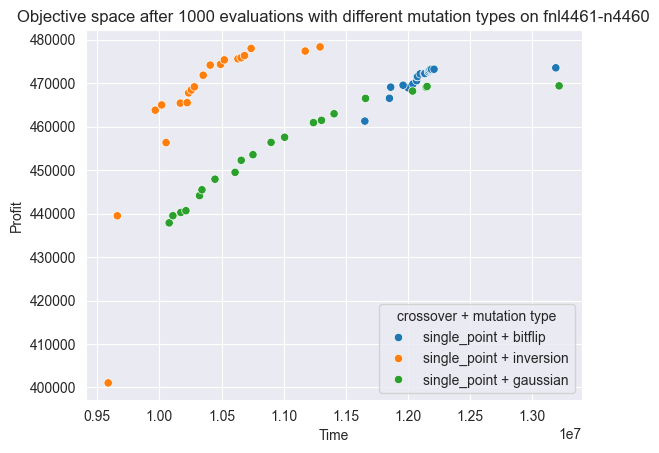

In [40]:
scatter = sns.scatterplot(x='Time', y='Profit', hue='exp_type', data=df_muta)
scatter.legend(title="crossover + mutation type")
plt.title(f"Objective space after 1000 evaluations with different mutation types on {dataset_name}")
plt.show()

### Mutation comparison

In [41]:
exp_type_corss = [0, 6, 10, 20]

df_corss = df_clean[df_clean['exp_type'].isin(exp_type_corss)]

In [42]:
crossover_label = {0: 'single_point + bitflip', 6: 'binary_mask + bitflip', 10: 'ordered + bitflip', 20: 'ordered + inversion'}

df_corss.loc[:, 'exp_type'] = df_corss['exp_type'].replace(crossover_label)

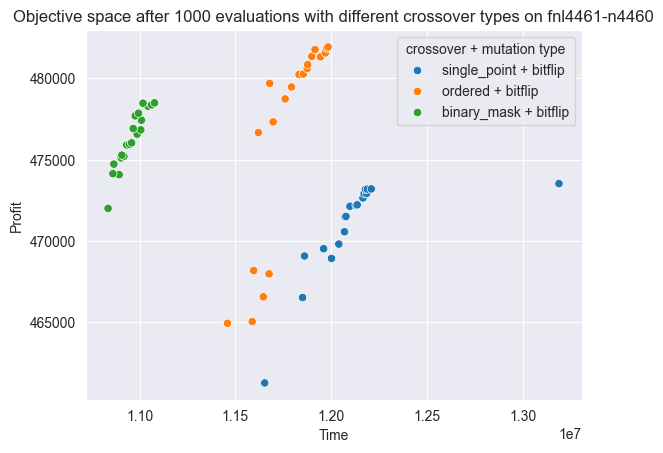

In [43]:
scatter = sns.scatterplot(x='Time', y='Profit', hue='exp_type', data=df_corss)
scatter.legend(title="crossover + mutation type")
plt.title(f"Objective space after 1000 evaluations with different crossover types on {dataset_name}")
plt.show()

### Hypervolume

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         100 non-null    float64
 1   Profit       100 non-null    float64
 2   Hypervolume  500 non-null    float64
 3   exp_type     500 non-null    float64
dtypes: float64(4)
memory usage: 15.8 KB


In [45]:
df_hv = df.iloc[:, [2, 3]].copy()
df_hv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Hypervolume  500 non-null    float64
 1   exp_type     500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [46]:
df_hv['exp_type'].unique()

array([ 0., 10.,  1.,  2.,  6.])

In [47]:
df_hv

,Hypervolume,exp_type
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
495,1.0,6.0
496,1.0,6.0
497,1.0,6.0
498,1.0,6.0


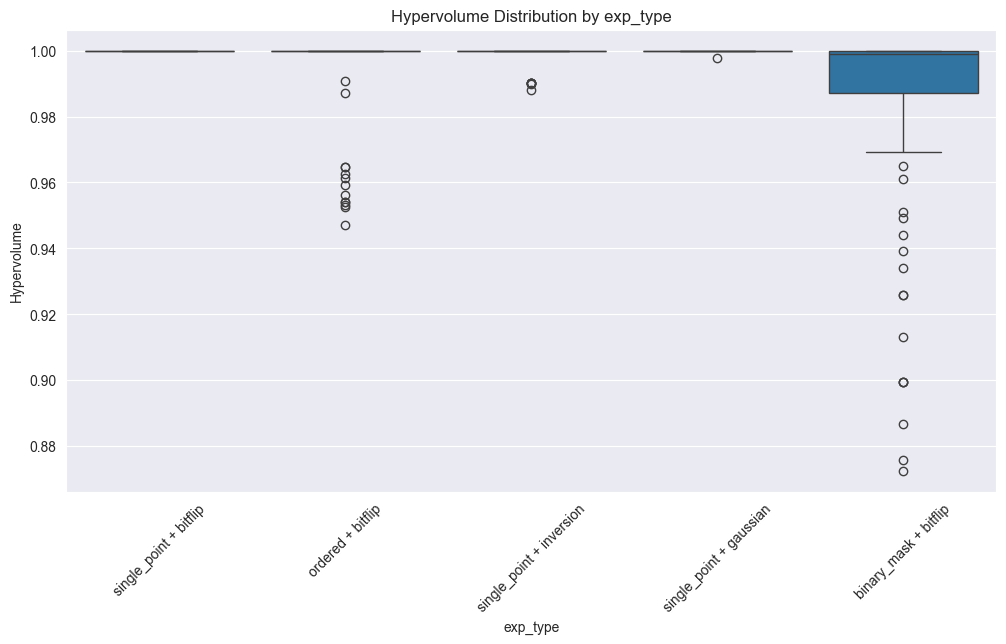

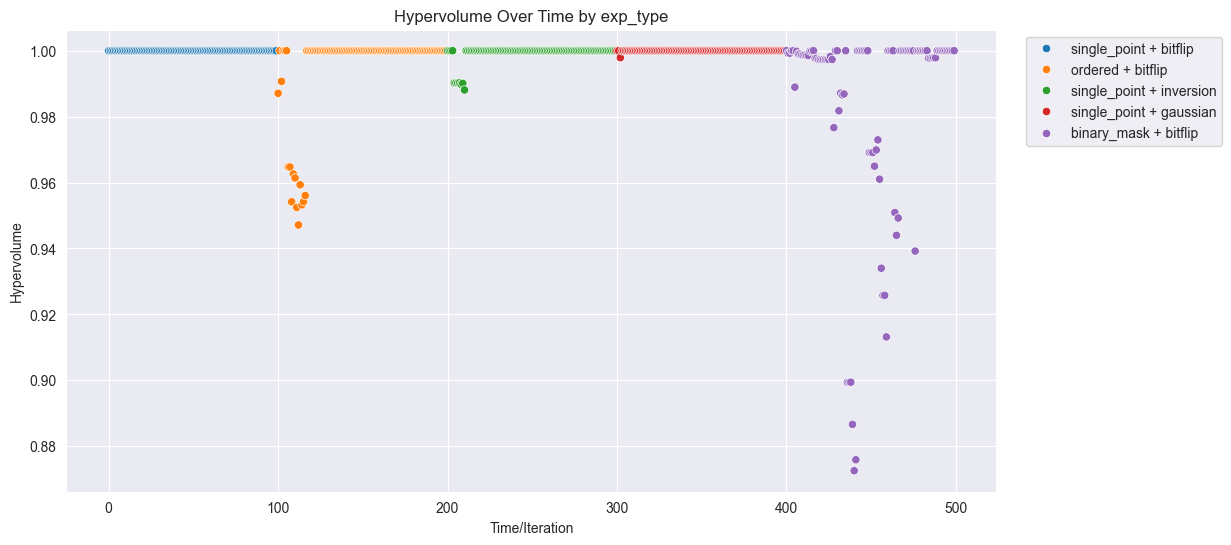

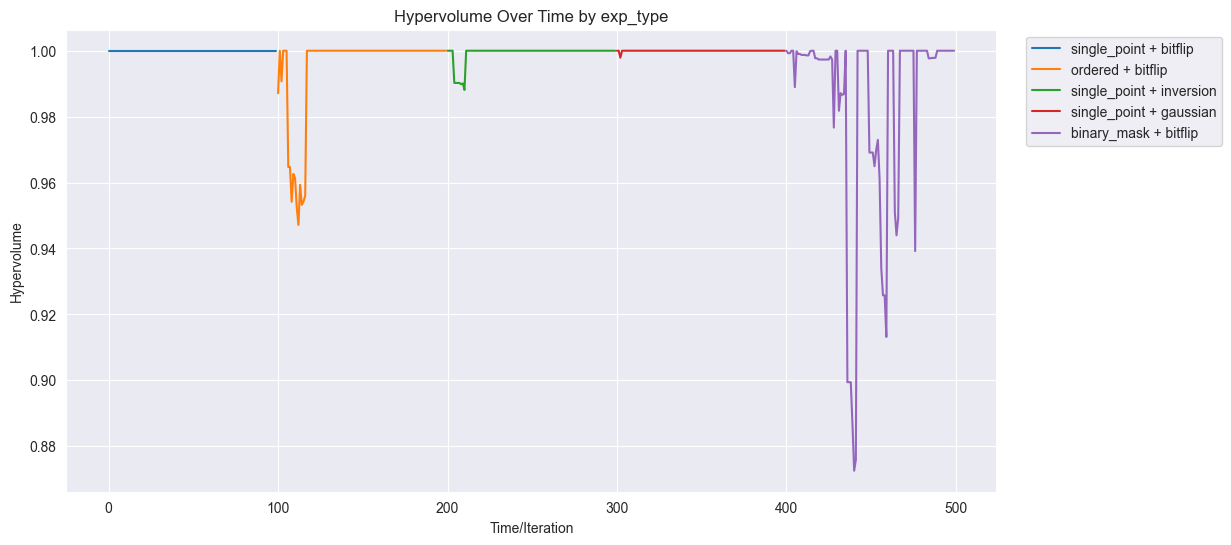

In [48]:
for old_value, new_value in crossover_label.items():
    df_hv['exp_type'] = df_hv['exp_type'].replace(old_value, new_value)

for old_value, new_value in mutation_label.items():
    df_hv['exp_type'] = df_hv['exp_type'].replace(old_value, new_value)

plt.figure(figsize=(12, 6))
sns.boxplot(x='exp_type', y='Hypervolume', data=df_hv)
plt.title('Hypervolume Distribution by exp_type')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_hv.index, y='Hypervolume', hue='exp_type', data=df_hv)
plt.title('Hypervolume Over Time by exp_type')
plt.xlabel('Time/Iteration')
plt.ylabel('Hypervolume')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

plt.figure(figsize=(12, 6))
for exp_type in df_hv['exp_type'].unique():
    subset = df_hv[df_hv['exp_type'] == exp_type]
    plt.plot(subset.index, subset['Hypervolume'], label=exp_type)

plt.xlabel('Time/Iteration')
plt.ylabel('Hypervolume')
plt.title('Hypervolume Over Time by exp_type')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

### The resluts of objective space on different datasets based on best choice of crossover and mutation

In [59]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         20 non-null     float64
 1   Profit       20 non-null     float64
 2   Hypervolume  100 non-null    float64
 3   exp_type     100 non-null    int64  
 4   dataset_idx  100 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 4.0 KB


In [62]:
df0.isnull().sum()

Time           0
Profit         0
Hypervolume    0
exp_type       0
dataset_idx    0
dtype: int64

In [61]:
df0.dropna(inplace=True)

In [63]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         20 non-null     float64
 1   Profit       20 non-null     float64
 2   Hypervolume  20 non-null     float64
 3   exp_type     20 non-null     int64  
 4   dataset_idx  20 non-null     int64  
dtypes: float64(3), int64(2)
memory usage: 960.0 bytes


In [65]:
df0.head()

,Time,Profit,Hypervolume,exp_type,dataset_idx
0,9987.099282,1297715.0,0.979477,20,a280-n2790
1,9987.099282,1302323.0,0.995897,20,a280-n2790
2,9987.467639,1302824.0,1.000000,20,a280-n2790
3,9987.467639,1303020.0,0.999201,20,a280-n2790
4,9987.467639,1303737.0,0.999276,20,a280-n2790


In [64]:
df0.loc[:, 'dataset_idx'] = df0['dataset_idx'].replace(dataset_label)

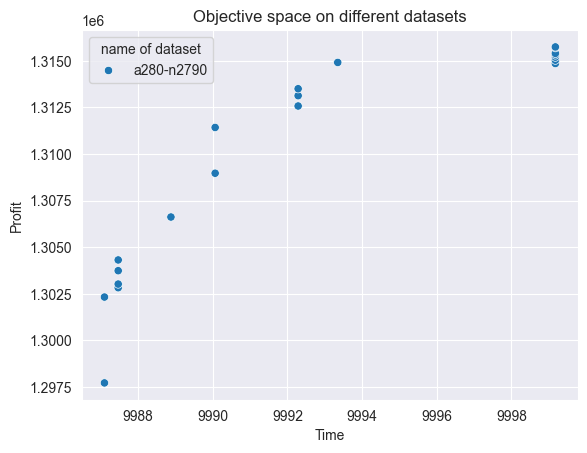

In [66]:
scatter = sns.scatterplot(x='Time', y='Profit', hue='dataset_idx', data=df0)
scatter.legend(title="name of dataset")
plt.title("Objective space on different datasets")
plt.show()